In [171]:
import numpy as np
import matplotlib.pyplot as plt

In [209]:
f = open('../Downloads/gundata_1128/guntest_1128_1.txt', 'r')

In [210]:
f2 = open('../Downloads/gundata_1128/gunpower_1128_1.txt', 'r')

In [211]:
content = f.read()
content2 = f2.read()

In [212]:
data = content[55::]
data2 = content2[18::]

In [213]:
res = list(map(str.strip, data.split(',')))
res2 = list(map(str.strip, data2.split(',')))

In [235]:
len(res)

86887

In [216]:
data_list = ['WGTCAVT','WGTCAV','WGFCTLT','WGFCTL','WGFLWT','WGFLW']
# this is: 
#1. the time for the Cavity temp
#2. the Cavity temp
#3. the time for the Flow Valve
#4. the Flow Valve
#5. the time for the Flow Rate
#6. the Flow Rate
data_list2 = ["GCVFPMT","GCVFPM"]
#7. the gun forward power time
#8. the gun forward power

In [217]:
# checking the parts of the file

In [218]:
res[0], res[1], res[2],res[3],res[4],res[5]

('0.0000', '42.9920', '0.0000', '19.0326', '0.0000', '3.5872')

In [219]:
res[0+6], res[1+6], res[2+6],res[3+6],res[4+6],res[5+6]

('0.0003', '42.9920', '0.0003', '19.0539', '0.0003', '3.5827')

In [237]:
res[-7], res[-6], res[-5],res[-4],res[-3],res[-2]

('3.9998', '42.9920', '3.9998', '14.4045', '3.9998', '2.7641')

In [245]:
res[-1], res2[-1] #last cells are empty

('', '')

In [246]:
res=res[0:-1]
res2=res2[0:-1]

In [250]:
lenres1 = int(len(res)/6)
lenres2 = int(len(res2)/2)

In [257]:
lenres1, lenres2 # the times will need to be aligned

(14481, 14470)

In [252]:
# putting it into a numpy file and converting to numbers from strings
data1 = np.zeros((lenres1,6))
j=0
for i in range(0, lenres1):
    data1[i,:]= res[j],res[j+1],res[j+2],res[j+3],res[j+4],res[j+5]
    j=j+6

    
# putting it into a numpy file and converting to numbers from strings
data2 = np.zeros((lenres2,2))
j=0
for i in range(0, lenres2):
    data2[i,:]= res2[j],res2[j+1]
    j=j+2
    

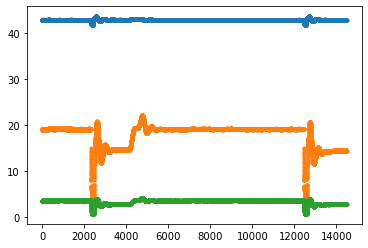

In [253]:
plt.plot(data1[:,1],'.')
plt.plot(data1[:,3],'.')
plt.plot(data1[:,5],'.')
plt.show()

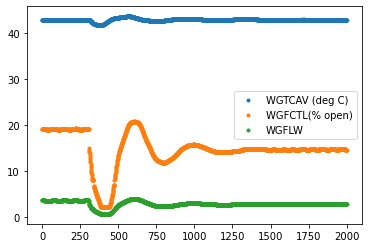

In [254]:
plt.plot(data1[2000:4000,1],'.')
plt.plot(data1[2000:4000,3],'.')
plt.plot(data1[2000:4000,5],'.')
plt.legend(['WGTCAV (deg C)','WGFCTL(% open)','WGFLW'])
plt.show()

In [255]:
data2.shape, data1.shape

((14470, 2), (14481, 6))

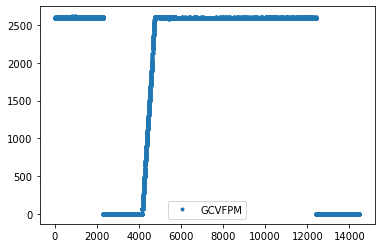

In [256]:
plt.plot(data2[:,1],'.')
plt.legend(["GCVFPM"])
plt.show()

In [ ]:

#  Heater setting N:WGHPWR is setting to 6.2kW all the time
#  WGT02 gun supply temp is at 40.9+-0.2 degree. That doesn’t change even when gun is on
#  WGT01 is LCW supply temp is sitting at 32 degree

In [271]:
#Steps:
#    1. align the values by the timestamps (see below there's a difference in the two files)
#    2. put WGFCTL, WGFLW, GCVFPM in X input data 
#    3. make input data the same size for the heater power (N:WGHPWR) above,
#      which was constant 6.2kW for this whole data set; add to X input data
#    4. do the same as 3 but for the LCW supply temperature (32 degrees); add to X input data
#    5. put WGTCAV in Y output data
#    6. train LSTM


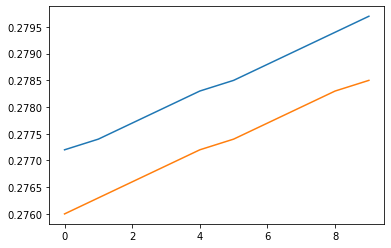

In [267]:
plt.plot(data2[1000:1010,0])
plt.plot(data1[1000:1010,0])